# Image classification with TensorFlow Lite Model Maker


Follows the example
and then adapts it to Wes or not Wes.



https://www.tensorflow.org/lite/models/modify/model_maker/image_classification

data structure 

```
data/ 
    not_wes/
        img.jpg
    wes/
        img.jpg
```

In [1]:
import os
import numpy as np
from pathlib import Path
import imghdr

import tensorflow as tf

assert tf.__version__.startswith("2")

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

%load_ext nb_black

2023-03-09 12:36:22.878161: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<IPython.core.display.Javascript object>

```
flower_photos
|__ daisy
    |______ 100080576_f52e8ee070_n.jpg
    |______ 14167534527_781ceb1b7a_n.jpg
    |______ ...
|__ dandelion
    |______ 10043234166_e6dd915111_n.jpg
    |______ 1426682852_e62169221f_m.jpg
    |______ ...
|__ roses
    |______ 102501987_3cdb8e5394_n.jpg
    |______ 14982802401_a3dfb22afb.jpg
    |______ ...
|__ sunflowers
    |______ 12471791574_bb1be83df4.jpg
    |______ 15122112402_cafa41934f.jpg
    |______ ...
|__ tulips
    |______ 13976522214_ccec508fe7.jpg
    |______ 14487943607_651e8062a1_m.jpg
    |______ ...
```

In [ ]:
image_path = tf.keras.utils.get_file(
    "flower_photos.tgz",
    "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz",
    extract=True,
)
image_path = os.path.join(os.path.dirname(image_path), "flower_photos")
image_path

In [ ]:
data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

In [ ]:
model = image_classifier.create(train_data)

In [ ]:
loss, accuracy = model.evaluate(test_data)

In [ ]:
# model.export(export_dir=".")

# Try with Wes Images

In [2]:
# Identify problem images (or .DS_Store files)
image_path = "/Users/rory/data/how_much_wes/wes_anderson/data/"


for filepath in Path(image_path).rglob("*"):
    if filepath.is_file():
        if not imghdr.what(filepath):
            print(filepath)

/Users/rory/data/how_much_wes/wes_anderson/data/.DS_Store
/Users/rory/data/how_much_wes/wes_anderson/data/not_wes/.DS_Store


<IPython.core.display.Javascript object>

In [3]:
data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
INFO:tensorflow:Load image with size: 2852, num_label: 2, labels: not_wes, wes.


<IPython.core.display.Javascript object>

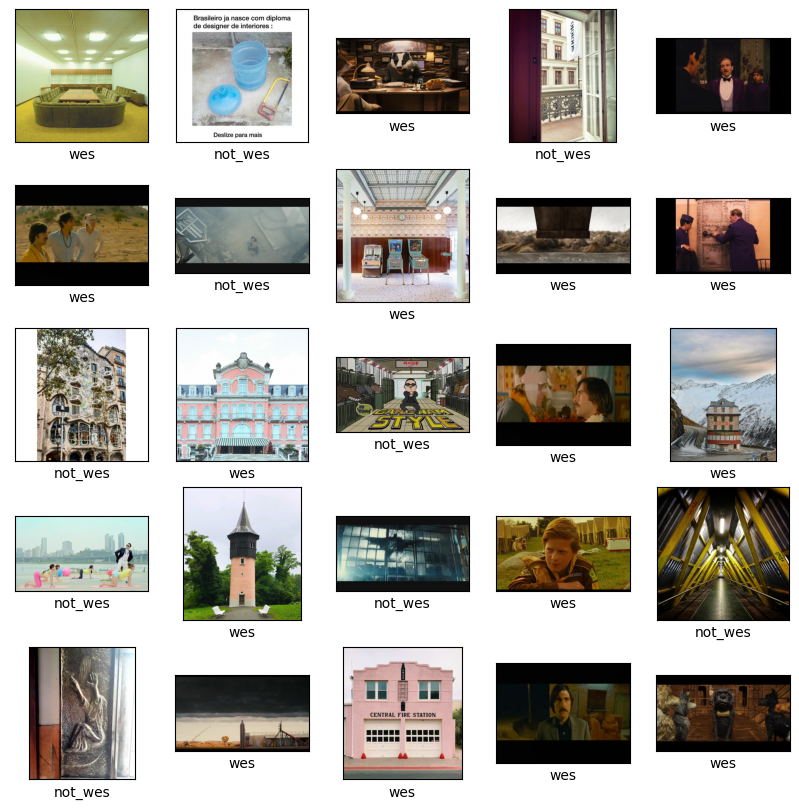

<IPython.core.display.Javascript object>

In [4]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image.numpy(), cmap=plt.cm.gray)
    plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [9]:
model = image_classifier.create(
    train_data, model_spec="efficientnet_lite4", epochs=10, use_augmentation=True
)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_2 (Hub  (None, 1280)             11837936  
 KerasLayerV1V2)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 11,840,498
Trainable params: 2,562
Non-trainable params: 11,837,936
_________________________________________________________________
None
INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


Epoch 1/10
80/80 [==============================] - 182s 2s/step - loss: 0.5853 - accuracy: 0.7113
Epoch 2/10
80/80 [==============================] - 179s 2s/step - loss: 0.5050 - accuracy: 0.8020
Epoch 3/10
80/80 [==============================] - 178s 2s/step - loss: 0.4956 - accuracy: 0.8074
Epoch 4/10
80/80 [==============================] - 179s 2s/step - loss: 0.4800 - accuracy: 0.8160
Epoch 5/10
80/80 [==============================] - 178s 2s/step - loss: 0.4773 - accuracy: 0.8203
Epoch 6/10
80/80 [==============================] - 179s 2s/step - loss: 0.4804 - accuracy: 0.8188
Epoch 7/10
80/80 [==============================] - 177s 2s/step - loss: 0.4831 - accuracy: 0.8137
Epoch 8/10
80/80 [==============================] - 184s 2s/step - loss: 0.4761 - accuracy: 0.8289
Epoch 9/10
80/80 [==============================] - 182s 2s/step - loss: 0.4668 - accuracy: 0.8258
Epoch 10/10
80/80 [==============================] - 186s 2s/step - loss: 0.4897 - accuracy: 0.8176


<IPython.core.display.Javascript object>

In [10]:
loss, accuracy = model.evaluate(test_data)

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


9/9 [==============================] - 26s 2s/step - loss: 0.4563 - accuracy: 0.8427


<IPython.core.display.Javascript object>

In [12]:
model.export(export_dir="efficientnet_lite4")

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Assets written to: /var/folders/0p/62m163zd22d3w3186wq2wq6r0000gq/T/tmp6224vyfa/assets


INFO:tensorflow:Assets written to: /var/folders/0p/62m163zd22d3w3186wq2wq6r0000gq/T/tmp6224vyfa/assets
/Users/rory/anaconda3/envs/new_wes/lib/python3.8/site-packages/tensorflow/lite/python/convert.py:765: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
2023-03-09 13:23:14.549939: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-03-09 13:23:14.550395: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
fully_quantize: 0, inference_type: 6, input_inference_type: UINT8, output_inference_type: UINT8


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /var/folders/0p/62m163zd22d3w3186wq2wq6r0000gq/T/tmpm8t817nc/labels.txt


INFO:tensorflow:Saving labels in /var/folders/0p/62m163zd22d3w3186wq2wq6r0000gq/T/tmpm8t817nc/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: efficientnet_lite4/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: efficientnet_lite4/model.tflite


<IPython.core.display.Javascript object>

In [13]:
# Compare to default image classifier
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_3 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________


None
Epoch 1/5
80/80 [==============================] - 50s 607ms/step - loss: 0.5138 - accuracy: 0.7867
Epoch 2/5
80/80 [==============================] - 51s 637ms/step - loss: 0.3890 - accuracy: 0.8875
Epoch 3/5
80/80 [==============================] - 53s 660ms/step - loss: 0.3706 - accuracy: 0.9008
Epoch 4/5
80/80 [==============================] - 53s 659ms/step - loss: 0.3555 - accuracy: 0.9117
Epoch 5/5
80/80 [==============================] - 52s 648ms/step - loss: 0.3507 - accuracy: 0.9211


<IPython.core.display.Javascript object>

In [14]:
loss, accuracy = model.evaluate(test_data)

9/9 [==============================] - 13s 637ms/step - loss: 0.3775 - accuracy: 0.8846


<IPython.core.display.Javascript object>

In [15]:
model = image_classifier.create(train_data, epochs=15, use_augmentation=True)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_4 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________
None
INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


Epoch 1/15
80/80 [==============================] - 45s 547ms/step - loss: 0.5747 - accuracy: 0.7426
Epoch 2/15
80/80 [==============================] - 43s 535ms/step - loss: 0.4866 - accuracy: 0.8277
Epoch 3/15
80/80 [==============================] - 44s 553ms/step - loss: 0.4795 - accuracy: 0.8305
Epoch 4/15
80/80 [==============================] - 45s 560ms/step - loss: 0.4281 - accuracy: 0.8617
Epoch 5/15
80/80 [==============================] - 46s 572ms/step - loss: 0.4438 - accuracy: 0.8531
Epoch 6/15
80/80 [==============================] - 44s 553ms/step - loss: 0.4367 - accuracy: 0.8539
Epoch 7/15
80/80 [==============================] - 44s 543ms/step - loss: 0.4330 - accuracy: 0.8535
Epoch 8/15
80/80 [==============================] - 43s 539ms/step - loss: 0.4243 - accuracy: 0.8602
Epoch 9/15
80/80 [==============================] - 45s 554ms/step - loss: 0.4530 - accuracy: 0.8402
Epoch 10/15
80/80 [==============================] - 45s 564ms/step - loss: 0.4397 - accura

<IPython.core.display.Javascript object>

In [16]:
loss, accuracy = model.evaluate(test_data)

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


9/9 [==============================] - 10s 516ms/step - loss: 0.3868 - accuracy: 0.8986


<IPython.core.display.Javascript object>

In [17]:
model = image_classifier.create(train_data, epochs=10)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_5 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 1280)              0         
                                                                 
 dense_5 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________


None
Epoch 1/10
80/80 [==============================] - 50s 608ms/step - loss: 0.5336 - accuracy: 0.7773
Epoch 2/10
80/80 [==============================] - 53s 653ms/step - loss: 0.4036 - accuracy: 0.8773
Epoch 3/10
80/80 [==============================] - 54s 671ms/step - loss: 0.3746 - accuracy: 0.8980
Epoch 4/10
80/80 [==============================] - 55s 679ms/step - loss: 0.3633 - accuracy: 0.9016
Epoch 5/10
80/80 [==============================] - 54s 675ms/step - loss: 0.3518 - accuracy: 0.9172
Epoch 6/10
80/80 [==============================] - 55s 680ms/step - loss: 0.3501 - accuracy: 0.9172
Epoch 7/10
80/80 [==============================] - 53s 658ms/step - loss: 0.3483 - accuracy: 0.9223
Epoch 8/10
80/80 [==============================] - 57s 703ms/step - loss: 0.3452 - accuracy: 0.9270
Epoch 9/10
80/80 [==============================] - 55s 680ms/step - loss: 0.3431 - accuracy: 0.9168
Epoch 10/10
80/80 [==============================] - 58s 723ms/step - loss: 0.3456 - a

<IPython.core.display.Javascript object>

In [18]:
loss, accuracy = model.evaluate(test_data)

9/9 [==============================] - 15s 696ms/step - loss: 0.3824 - accuracy: 0.8811


<IPython.core.display.Javascript object>

# Inference 

In [ ]:
from tflite_support.task import vision
from tflite_support.task import core

classifier = vision.ImageClassifier.create_from_file("model.tflite")

In [ ]:
# Run inference
image = vision.TensorImage.create_from_file(
    "/Users/rory/data/how_much_wes/wes_anderson/data/wes/accidentallywesanderson_18949937_679160838934445_2949582899495567360_n.jpg"
)
classification_result = classifier.classify(image)

In [ ]:
classification_result.classifications[0].categories[0].score

In [ ]:
classification_result.classifications